In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b9531f8fd2d049a280b62bb43d40eb2d3b5ab5c6385860830c5a39509e36c06f
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf
from sklearn.linear_model import LinearRegression

import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get a sample stock price from 2019-01-01 to today

In [3]:
# Get the data of the Apple stock (code AAPL)
data = yf.download('AAPL','2019-01-01','2020-04-30')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300


### Extract the Close price column to plot

In [4]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()
df.isna().values.any() # check for NaN

False

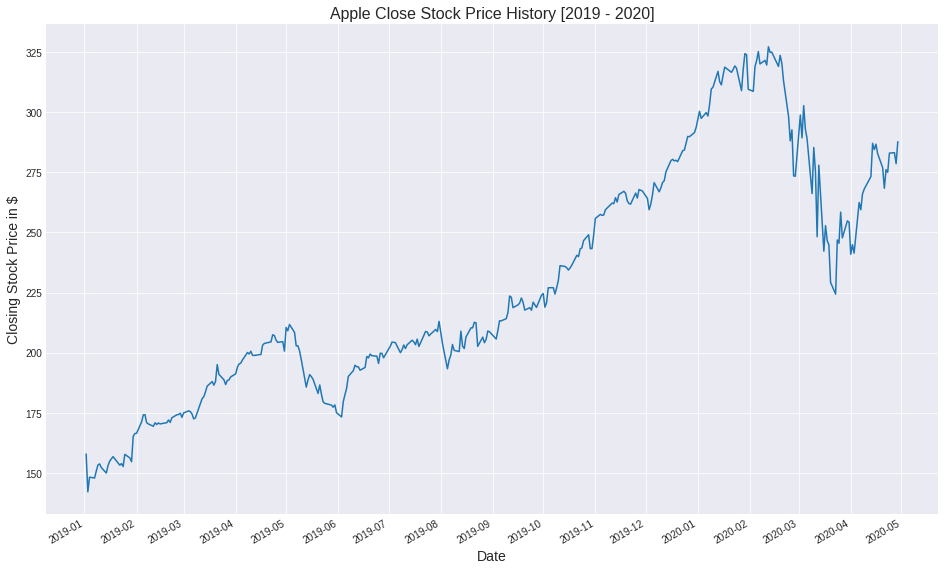

In [5]:
# Import matplotlib package for date plots

months = mdates.MonthLocator() # Get every year
dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

# Set figure title
plt.title('Apple Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

### Get stock of Apple, Google, Microsoft, Amazon, Facebook via Yahoo Finance

In [6]:
!mkdir data && touch close_price_big_5.csv
def get_close_stock_price(codes, start_date='2010-01-01', end_date='2020-05-10'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.to_csv('data/close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df = pd.read_csv('data/close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2012-05-18,75.768570,300.500488,29.270000,213.850006,38.230000
2012-05-21,80.182854,307.362366,29.750000,218.110001,34.029999
2012-05-22,79.567146,300.700714,29.760000,215.330002,31.000000
2012-05-23,81.508568,305.035034,29.110001,217.279999,32.000000
2012-05-24,80.760002,302.132141,29.070000,215.240005,33.029999


In [8]:
df.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08'],
              dtype='datetime64[ns]', name='Date', length=2006, freq=None)

In [9]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

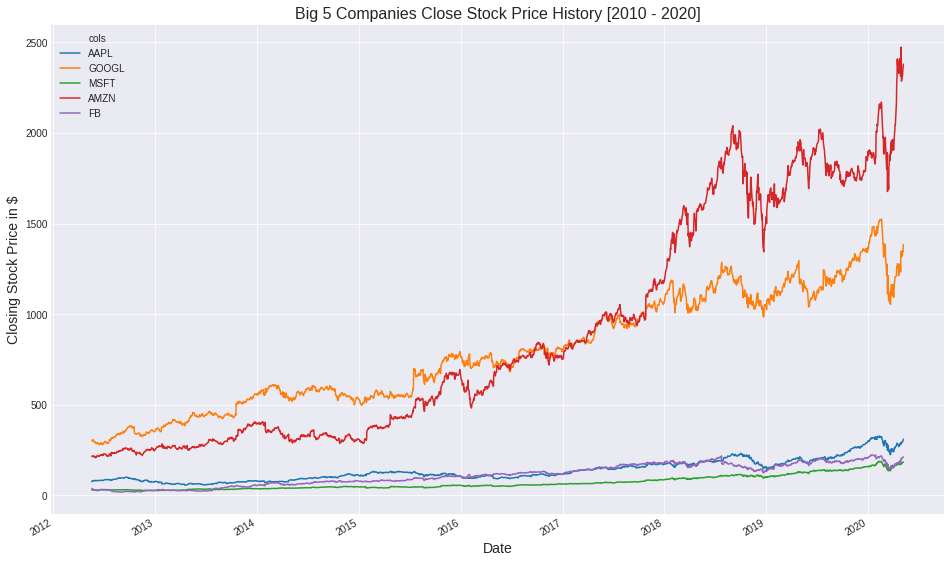

In [10]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2010 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Exercise
1. Play with the above code to get familiar with stock price data and ways to create training data ( X = past stock price, y = future stock price )
2. Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )
3. Determine the features that could predict future stock price ( stock price from Yahoo Finance could be considered as raw features, create new features if needed )
4. Build a linear regression model to predict future stock price
5. Evaluate your model performance

**2. Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )**

In [0]:
corr = df.corr(method='pearson')

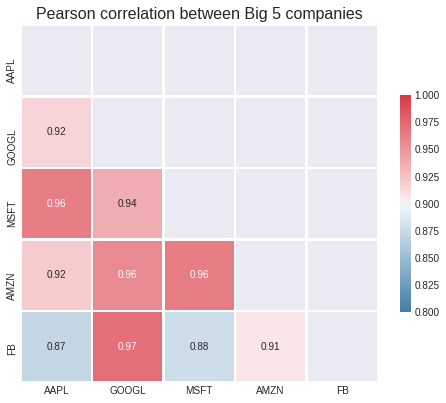

In [25]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 8))

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(
    corr,          
    mask=mask,     
    cmap=cmap,     
    annot=True,   
    vmax=1,       
    vmin=0.8,    
    center=0.9,     
    square=True,  
    linewidths=1.5, 
    cbar_kws={"shrink": .5})
plt.title("Pearson correlation between Big 5 companies", fontsize=16)
plt.show()

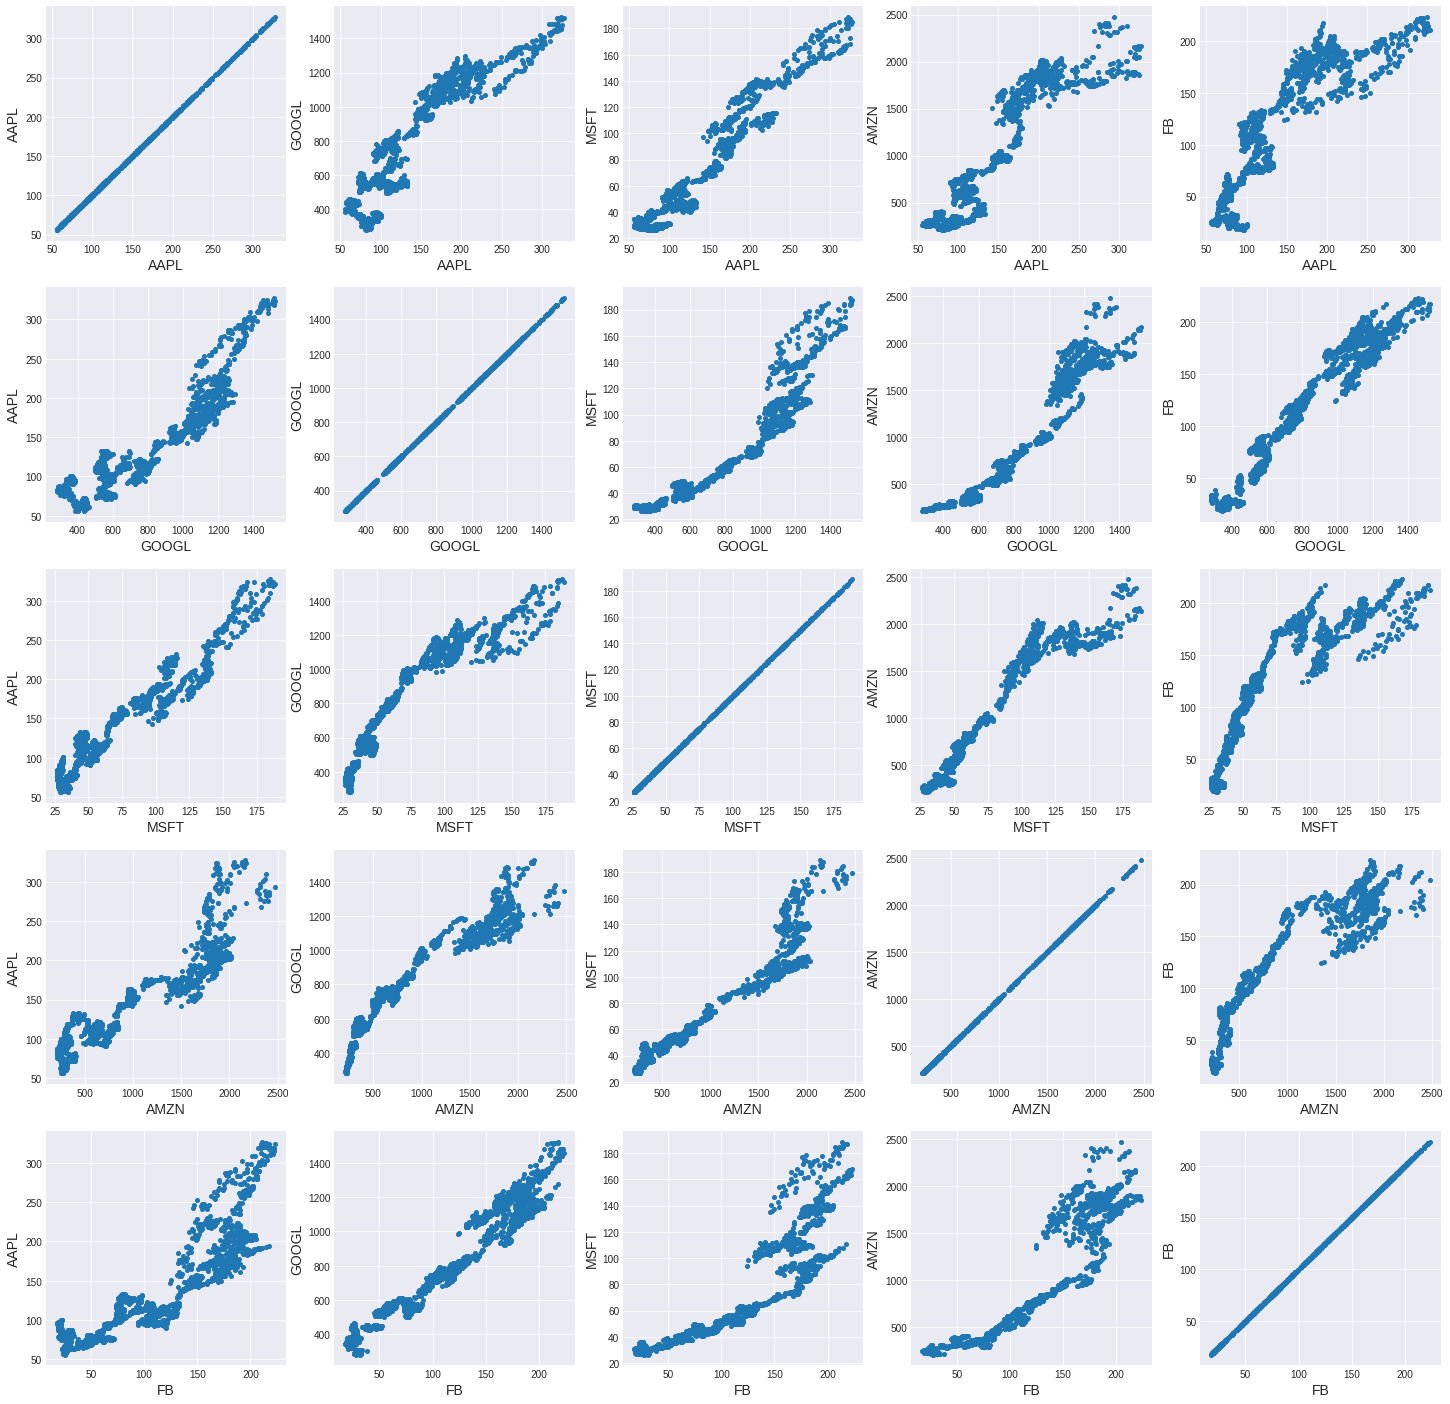

In [26]:
fig, ax = plt.subplots(5, 5, figsize=(25, 25))

for i, colA in enumerate(df):
    for j, colB in enumerate(df):
        ax[i,j].plot(df[colA], df[colB], "o")
        ax[i,j].set_xlabel(colA, fontsize=14)
        ax[i,j].set_ylabel(colB, fontsize=14)
plt.show()

In [0]:
plt.figure(figsize=(20, 5))
for col in df:
  normalize = (df[col] - df[col].min())/(df[col].max() - df[col].min())
  plt.plot(normalize, "-")
plt.title("Normalize stock price of 5 companies", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

**Nhận xét:** <br>
Pearson correlation cho các giá cổ phiếu của 5 công ty từ năm "2010 đến nay" như sau: <br>
  - GOOGL và FB: 0.97
  - GOOGL và AMZN: 0.96
  - AMZN và MSFT: 0.96
  - AAPL và MSFT: 0.96
  - GOOGL và MSFT: 0.94
  - AAPL và AMZN: 0.92
  - AAPL và GOOGL: 0.92
  - AMZN và FB: 0.91
  - FB và MSFT: 0.88
  - FB và AAPL: 0.87 
  <br><br>
**->** Giá cổ phiếu giữa các công ty có sự tương quan với nhau. Tuy nhiên, AAPL và FB có giá tri tương quan ít nhất (0.87), GOOGL và FB có sự tương quan nhiều nhất (0.97). FB là công ty có sự tương quan với giá cổ phiếu của các công ty khác là ít nhất. Ngược lại, GOOGL có giá trị tương quan cao nhất so với các công ty khác

**3. Determine the features that could predict future stock price (stock price from Yahoo Finance could be considered as raw features, create new features if needed)**

Feature: 25 features tương ứng với giá cổ phiếu của 5 ngày gần nhất

**4.Build a linear regression model to predict future stock price**

- Use stock price of 5 companies
- Use close price
- Linear Regression

Create X, y matrices for regression
Use history = number of days before prediction date

In [0]:
def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( df.iloc[row_idx-history:row_idx,:].values.reshape(-1) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 5 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

**Linear Regression**

In [0]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred)

272.3590425038871

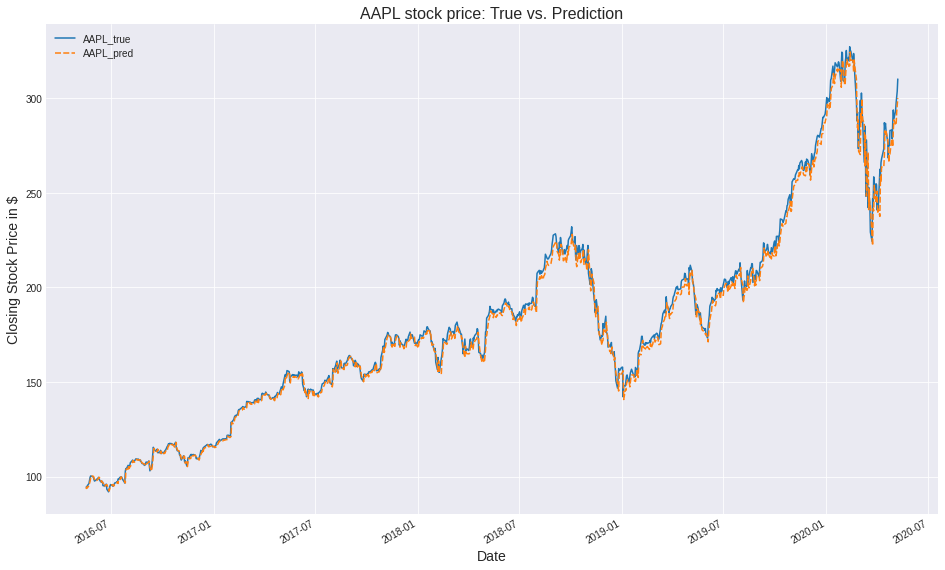

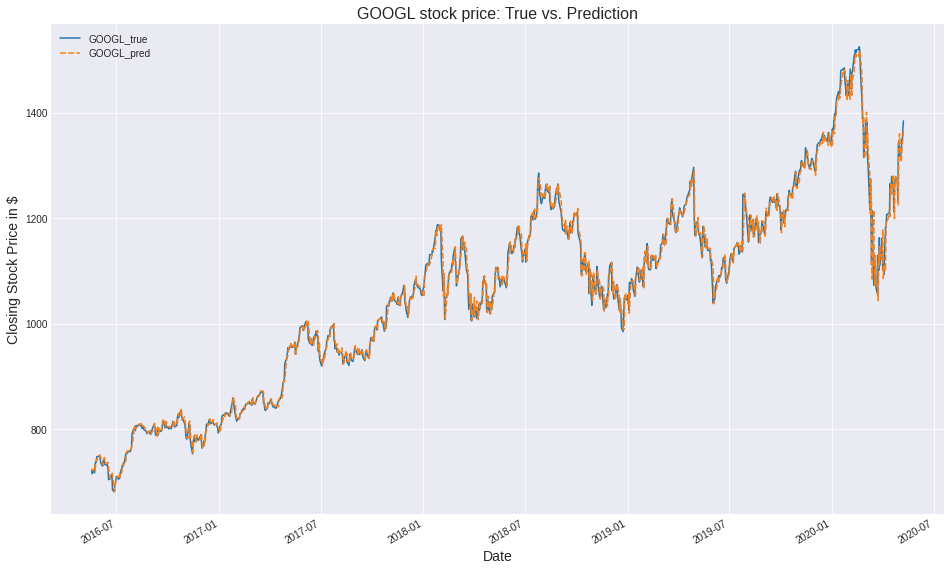

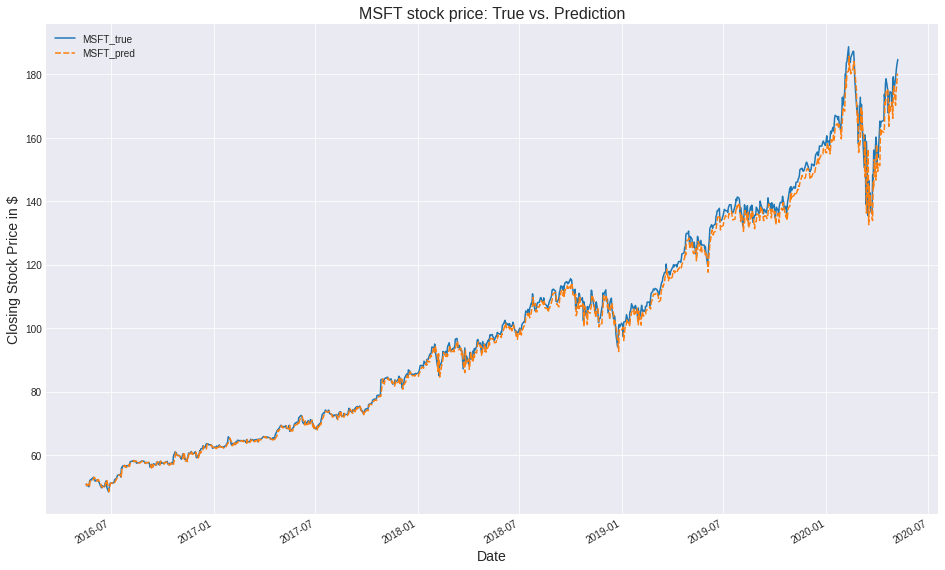

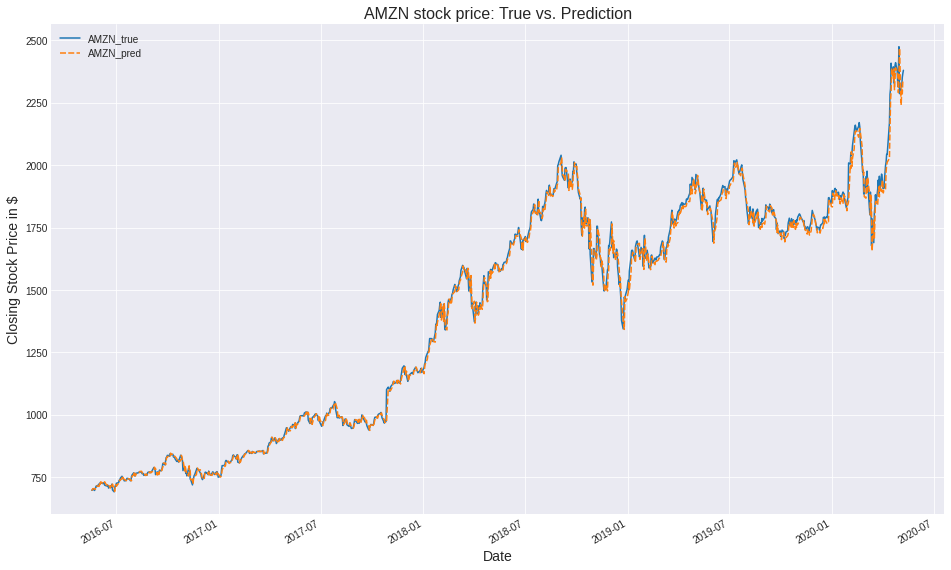

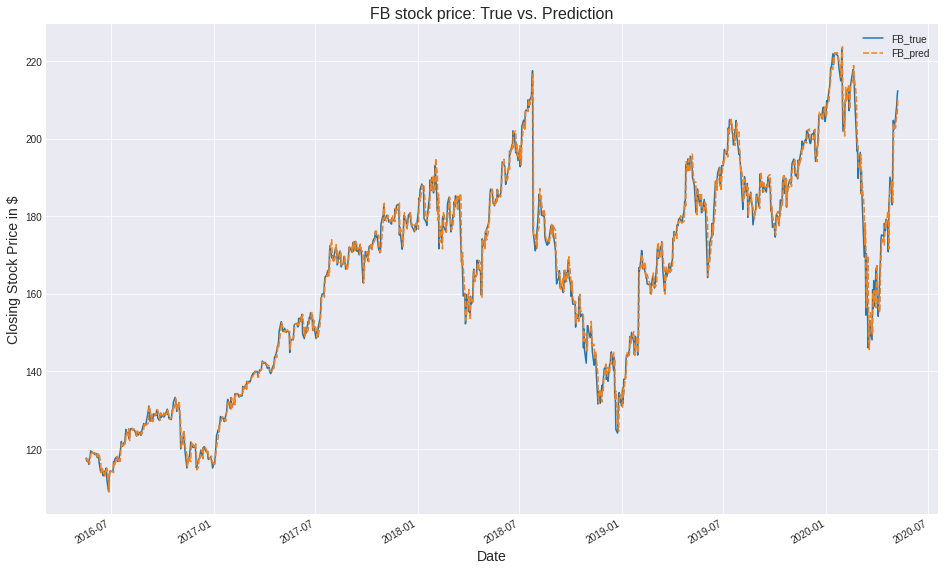

In [18]:
j = 0
for i in df.columns:
  df_plot = pd.DataFrame({f"{i}_true": y_test[:,j], f'{i}_pred': ypred[:,j]}, index=dates_test)

  # Create subplots to plot graph and control axes
  fig, ax = plt.subplots(figsize=(16,10))
  sns.lineplot(data=df_plot)

  # Format the ticks
  loc = mdates.AutoDateLocator()
  ax.xaxis.set_major_locator(loc)
  ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

  # Set figure title
  plt.title(f'{i} stock price: True vs. Prediction', fontsize=16)
  # Set x label
  plt.xlabel('Date', fontsize=14)
  # Set y label
  plt.ylabel('Closing Stock Price in $', fontsize=14)

  # Rotate and align the x labels
  fig.autofmt_xdate()

  # Show plot
  plt.show()
  j += 1

**Linear Regression + Back propagation**

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

In [0]:
class MLP(nn.Module):
  def __init__ (self, input, output, hidden=[128]):
    super().__init__()
    self.ReLU = nn.ReLU()
    self.fc1 = nn.Linear(input, output)
  
  def forward(self, x):
    x = self.fc1(x)
    return x

model = MLP(25, 5)

In [0]:
custom_X_train, custom_y_train, custom_X_test, custom_y_test = [
  torch.from_numpy(dataset).float() for dataset in [X_train, y_train, X_test, y_test]                                                              
]
optimizer = Adam(model.parameters(), lr = 0.001)
custom_X_train = (custom_X_train - custom_X_train.mean())/custom_X_train.std()
custom_y_train = (custom_y_train - custom_y_train.mean())/custom_y_train.std()
custom_X_test = (custom_X_test - custom_X_train.mean())/custom_X_train.std()
custom_y_test = (custom_y_test - custom_y_train.mean())/custom_y_train.std()

In [0]:
epochs = 10000
loss_func = nn.MSELoss()
for epoch in range(epochs):
  optimizer.zero_grad()
  y_pred = model(custom_X_train)
  loss = loss_func(y_pred, custom_y_train)
  loss.backward()
  optimizer.step()

  if epoch%10 == 0:
    with torch.no_grad():
      y_pred = model(custom_X_test)
      mse = loss_func(y_pred, custom_y_test)

In [23]:
y_pred = model(custom_X_test)
mse = loss_func(y_pred, custom_y_test)
mse

tensor(328.8627, grad_fn=<MseLossBackward>)

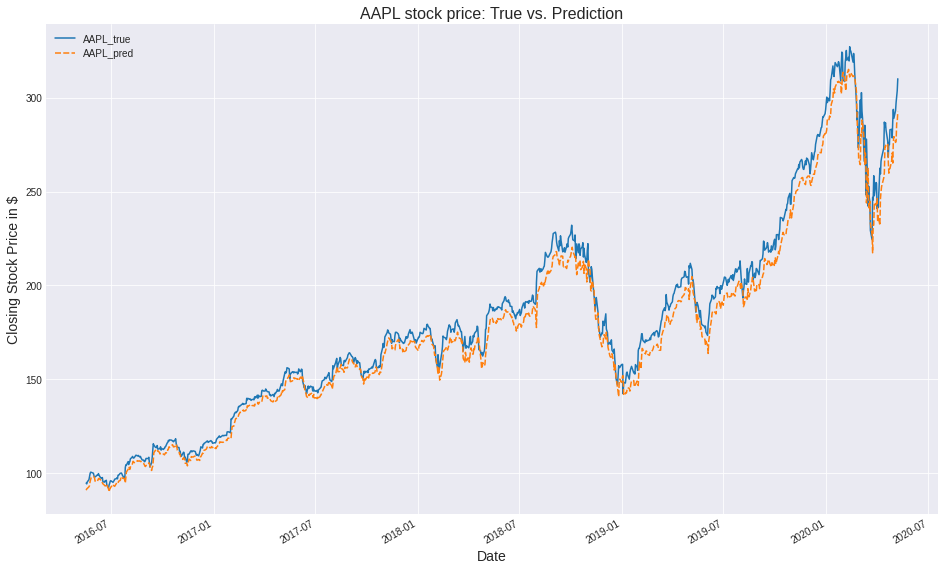

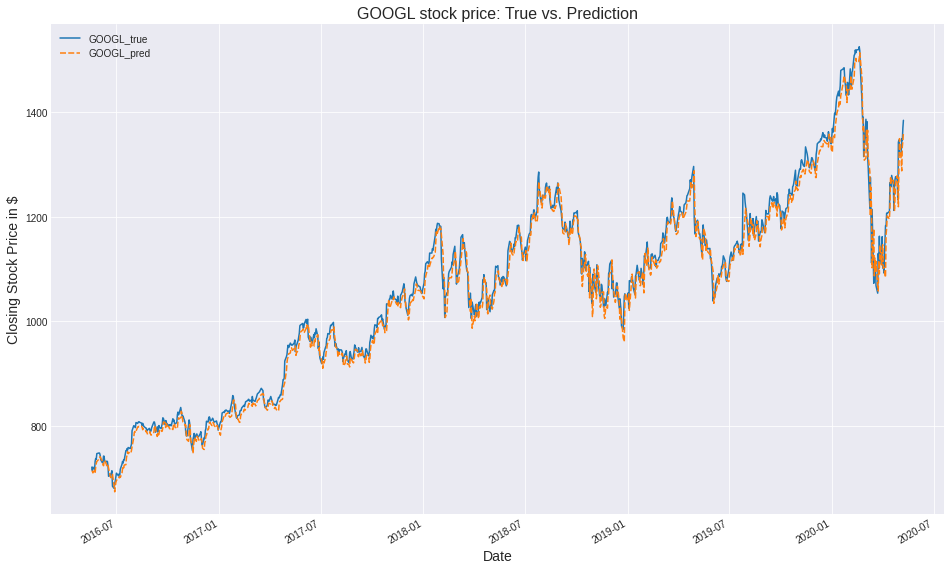

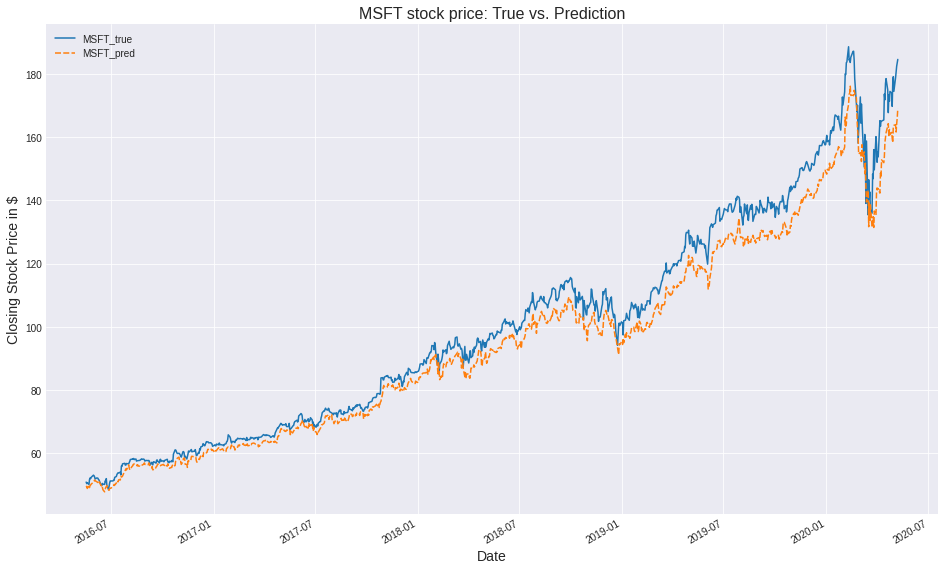

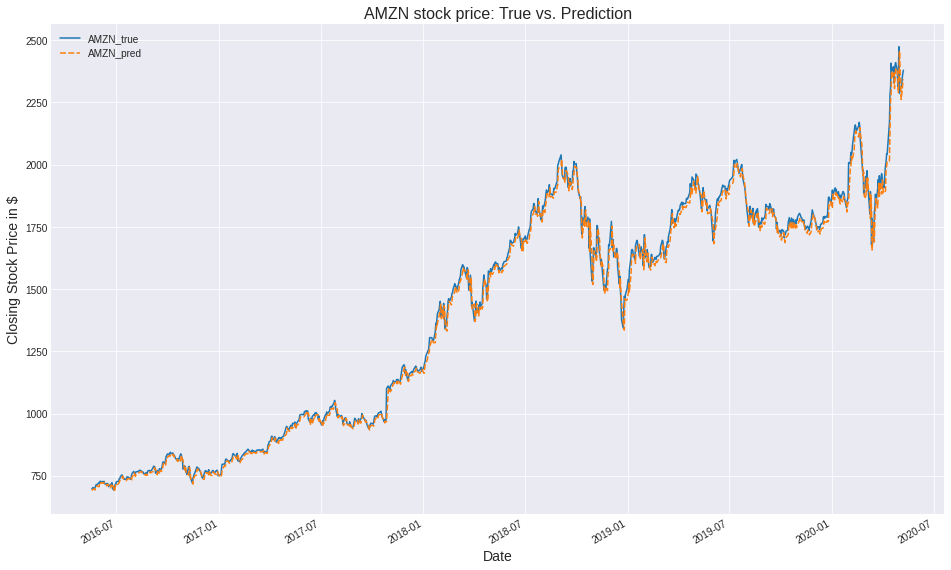

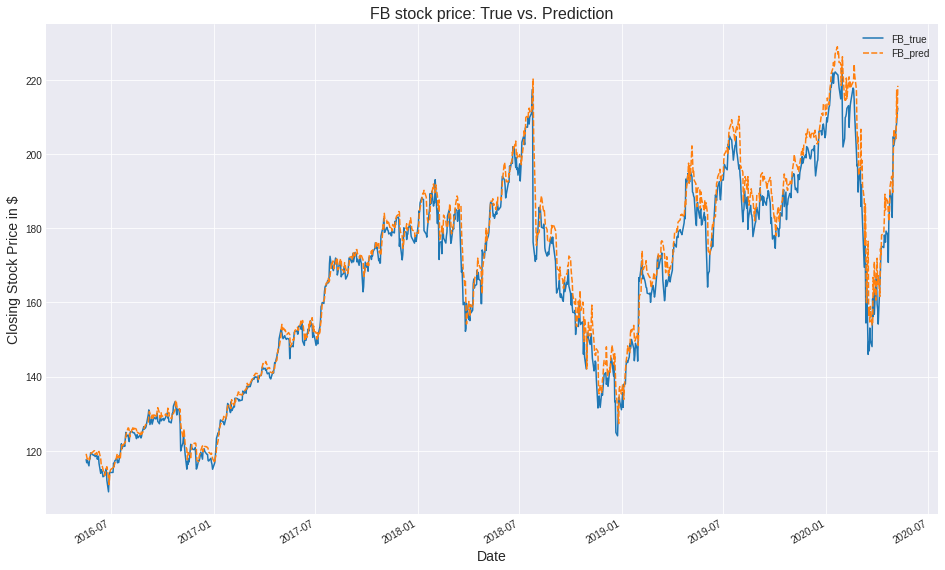

In [24]:
j = 0
y_pred = y_pred.detach().numpy()
for i in df.columns:
  df_plot = pd.DataFrame({f"{i}_true": y_test[:,j], f'{i}_pred': y_pred[:,j]}, index=dates_test)

  # Create subplots to plot graph and control axes
  fig, ax = plt.subplots(figsize=(16,10))
  sns.lineplot(data=df_plot)

  # Format the ticks
  loc = mdates.AutoDateLocator()
  ax.xaxis.set_major_locator(loc)
  ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

  # Set figure title
  plt.title(f'{i} stock price: True vs. Prediction', fontsize=16)
  # Set x label
  plt.xlabel('Date', fontsize=14)
  # Set y label
  plt.ylabel('Closing Stock Price in $', fontsize=14)

  # Rotate and align the x labels
  fig.autofmt_xdate()

  # Show plot
  plt.show()
  j += 1

**5. Evaluate your model performance**

**Linear Regresstion:** MSE = 323.4052000569346 <br>
**Linear Regresstion + Back Propagation:** MSE = 384.0801

=> Sử dụng Linear Regresstion cơ bản sẽ cho ra kết quả tốt hơn